## Data Processing
read data from file

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_column',1000)

In [316]:
data = pd.read_csv('raw_data.csv')
data.drop_duplicates(inplace=True)
df = data.drop(['ID', 'Flow.ID', 'Source.IP', 'Destination.IP','Timestamp'], axis=1)
data
#source destination IP不會成為features的原因是因為它們是相對independent的feature，
#不同的連線會有不同的ip所以不選擇當features
#flow id同理，另外time選每天的幾點當參考趨勢即可，不需細到分秒，不同的日期也不會成為參考的因素


,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,5,795,625,487,0,88.333333,166.426410,482,0,125.000000,208.954541,702.505322,6.926109,1.554875e+05,2.002634e+05,628017,18,2021337,2.526671e+05,2.169544e+05,628017,166,1420281,355070.250000,353491.658867,787050,2659,0,0,0,0,296,168,4.452499,2.473610,0,487,94.666667,171.162691,29296.666667,0,0,0,1,0,0,0,0,0,101.428571,88.333333,125.000000,296,0,0,0,0,0,0,9,795,5,625,14600,349,4,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,8,373,5252,223,0,26.642857,69.221614,1436,0,656.500000,629.575821,85809.738833,335.611423,3.121524e+03,5.149133e+03,16242,0,65552,5.042462e+03,8.776130e+03,28060,0,40687,5812.428571,8387.021678,21379,0,0,0,0,0,468,264,213.570906,122.040517,0,1436,244.565217,472.856294,223593.075099,0,0,0,1,0,0,0,0,0,255.681818,26.642857,656.500000,468,0,0,0,0,0,0,14,373,8,5252,14600,243,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,12,373,10784,223,0,26.642857,69.221614,1436,0,898.666667,617.268813,104239.853502,242.918006,4.281280e+03,9.401183e+03,39473,0,107032,8.233231e+03,1.363320e+04,39473,1,74405,6764.090909,15098.009779,48067,0,0,0,0,0,468,392,130.802003,112.116003,0,1436,413.222222,599.498466,359398.410256,0,0,0,1,0,0,0,0,0,429.115385,26.642857,898.666667,468,0,0,0,0,0,0,14,373,12,10784,14600,243,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,11,373,10784,223,0,26.642857,69.221614,2660,0,980.363636,817.007744,148067.046224,331.780600,3.139625e+03,5.354145e+03,17865,0,75351,5.796231e+03,9.061025e+03,29446,0,50419,5041.900000,9189.934378,25772,0,0,0,0,0,536,360,185.797136,145.983464,0,2660,429.115385,708.006968,501273.866154,0,0,0,1,0,0,0,0,0,446.280000,26.642857,980.363636,536,0,0,0,0,0,0,14,373,11,10784,14600,243,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,13,373,11396,223,0,24.866667,67.057403,1436,0,876.615385,585.702219,178691.810148,425.131335,2.439333e+03,5.375588e+03,19277,0,65862,4.704429e+03,1.027184e+04,38242,0,39747,3312.250000,6435.948572,20717,0,0,0,0,0,596,424,227.748930,197.382406,0,1436,405.827586,579.486168,335804.219212,0,0,0,1,0,0,0,0,0,420.321429,24.866667,876.615385,596,0,0,0,0,0,0,15,373,13,11396,14600,243,2,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,..

## 檢查各feature value分佈

In [17]:
data['Source.Port'].value_counts()

0        1631
57429     254
59979     237
51242     225
48859     181
         ... 
35059       1
49382       1
43215       1
45260       1
43007       1
Name: Source.Port, Length: 882, dtype: int64

In [621]:
pd.crosstab(data['Protocol'],data['Destination.Port']).T

Protocol,0,6,17
Destination.Port,,,
0,1631,0,0
53,0,147,1446
123,0,0,135
443,0,812,0
3128,0,7,0
32855,0,2,0
33900,0,1,0
35308,0,2,0
36116,0,1,0


In [623]:
pd.crosstab(data['Source.Port'],data['Destination.Port']).T

Source.Port,0,53,123,443,4241,32799,32804,32806,32816,32860,32863,32872,32890,32911,33152,33329,33331,33345,33358,33360,33366,33376,33377,33384,33387,33466,33468,33537,33654,33729,33798,33800,33822,33836,33843,33854,33921,33981,34011,34014,34134,34150,34156,34157,34173,34227,34293,34322,34366,34394,34412,34417,34454,34474,34476,34477,34574,34580,34598,34600,34672,34688,34709,34759,34864,34870,34871,34878,34910,34915,34947,34964,35001,35024,35059,35067,35136,35207,35213,35214,35218,35223,35226,35231,35237,35240,35246,35254,35271,35307,35315,35316,35319,35329,35332,35341,35352,35374,35382,35495,35553,35574,35637,35678,35791,35808,35809,35878,35894,35898,36051,36116,36146,36176,36197,36302,36319,36334,36343,36365,36366,36375,36416,36513,36528,36559,36673,36705,36799,36818,36848,36855,36899,36924,36927,36945,36974,37056,37087,37144,37181,37238,37242,37360,37362,37440,37457,37473,37559,37587,37598,37612,37622,37646,37767,37828,37849,37917,37921,38092,38177,38182,38211,38339,38341,38347,38389,38407,38415,38440,38540,38560,38582,38666,38700,38706,38824,38827,38854,38886,38897,38903,38904,38922,38928,38931,38934,38936,38956,38959,38972,39000,39001,39006,39012,39032,39037,39066,39072,39075,39088,39092,39093,39097,39103,39208,39218,39241,39244,39248,39273,39280,39285,39332,39351,39431,39442,39455,39461,39470,39480,39481,39485,39486,39582,39589,39619,39633,39662,39664,39683,39726,39737,39750,39791,39792,39793,39797,39845,39853,39856,39877,39881,39889,39894,39902,39931,39935,39961,39977,39981,40005,40009,40015,40044,40052,40056,40059,40118,40205,40217,40223,40228,40230,40239,40276,40280,40312,40393,40396,40401,40403,40416,40423,40424,40426,40431,40433,40447,40458,40469,40502,40510,40530,40543,40546,40571,40580,40585,40599,40646,40660,40689,40711,40722,40738,40793,40822,40836,40900,40949,40959,40966,40968,41006,41033,41058,41070,41088,41105,41119,41162,41209,41214,41244,41249,41306,41350,41401,41417,41424,41430,41478,41481,41500,41511,41512,41521,41539,41555,41571,41599,41630,41773,41806,41809,41827,41850,41889,41912,41924,41930,41980,42007,42036,42135,42139,42224,42231,42249,42254,42261,42287,42303,42305,42339,42390,42437,42590,42623,42633,42670,42741,42746,42749,42751,42840,42894,43007,43024,43031,43064,43066,43076,43079,43092,43140,43153,43168,43174,43177,43196,43215,43216,43316,43320,43341,43365,43399,43418,43463,43486,43527,43647,43716,43725,43813,43822,43858,43931,43932,43935,43941,44020,44077,44159,44198,44232,44282,44305,44314,44320,44355,44365,44466,44504,44538,44602,44615,44636,44753,44849,44884,44894,44912,45017,45020,45036,45043,45063,45149,45156,45159,45207,45245,45260,45337,45364,45472,45486,45490,45537,45564,45628,45648,45660,45721,45738,45821,45822,45828,45894,45942,46025,46039,46078,46119,46133,46153,46168,46183,46184,46221,46234,46378,46390,46444,46448,46463,46474,46475,46476,46546,46653,46659,46676,46687,46723,46726,46766,46769,46835,46860,46886,46894,46962,46969,46971,46975,47031,47034,47052,47122,47137,47140,47148,47149,47160,47163,47182,47197,47212,47220,47269,47322,47335,47363,47441,47477,47480,47507,47523,47530,47533,47541,47548,47579,47614,47623,47684,47696,47780,47781,47782,47790,47799,47810,47831,47876,47892,48083,48115,48219,48229,48254,48273,48314,48316,48320,48329,48341,48382,48471,48490,48522,48551,48561,48571,48575,48584,48624,48630,48640,48671,48742,48764,48818,48859,48936,48959,49042,49049,49128,49178,49223,49290,49375,49382,49444,49530,49539,49618,49620,49636,49653,49655,49697,49790,49824,49843,49863,49952,49960,49994,50188,50209,50218,50248,50285,50296,50299,50305,50322,50338,50378,50388,50392,50401,50407,50457,50508,50538,50546,50553,50580,50643,50649,50670,50807,50822,50854,50863,50867,50868,50999,51014,51021,51040,51047,51051,51075,51096,51105,51122,51147,51157,51161,51242,51292,51313,51569,51623,51647,51713,51719,51758,51793,51837,52087,52090,52116,52122,52154,52162,52174,52178,52183,52234,52240,52261,52332,52369,52520,52572,52585,52621,52659,52851,52931,53001,53028,53076,53094,53111,53112,53255,5328

In [18]:
data['Destination.Port'].value_counts()

0        1631
53       1593
443       812
123       135
51242      40
57429      20
59979      18
48859       8
3128        7
52931       4
54944       4
46237       3
59658       2
45244       2
56147       2
43188       2
35308       2
53926       2
56224       2
50823       2
50607       2
46492       2
32855       2
40797       2
50746       2
42846       2
37884       2
43919       2
56342       1
40068       1
55035       1
44034       1
46306       1
33900       1
37746       1
37542       1
51505       1
36116       1
Name: Destination.Port, dtype: int64

## timestamp feature transformation

In [317]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='%d/%m/%Y%H:%M:%S', errors='ignore')
df['time'] = [x.time().hour for x in data['Timestamp']]

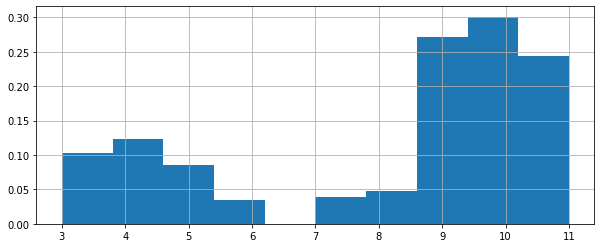

In [105]:
data['hour'] = [x.time().hour for x in data['Timestamp']]
data['hour'].hist(figsize=(10,4), density=True)

## Data Visualization 

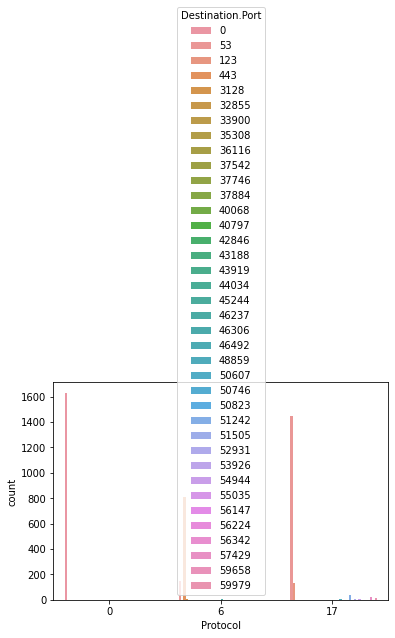

In [109]:
sns.countplot(x='Protocol', hue='Destination.Port',data=data)


In [318]:
df['Destination.Port'] = df['Destination.Port'].astype(str)
df['Source.Port'] = df['Source.Port'].astype(str)
df['Protocol'] = df['Protocol'].astype(str)
df['time'] = df['time'].astype(str)
catergoical_features=['time','Source.Port','Destination.Port', 'Label','Protocol']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138e19080>,
      dtype=object)

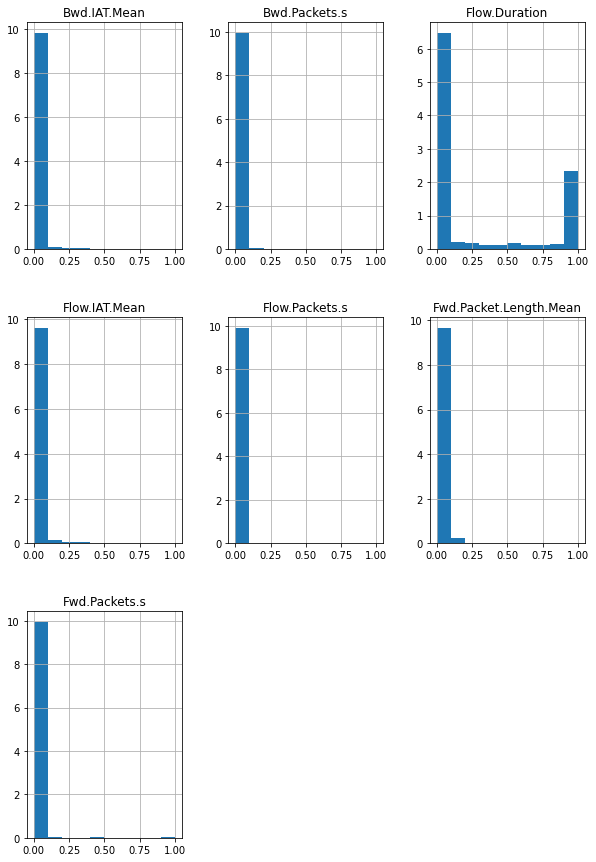

In [146]:
features = ['','Flow.Duration', 'Fwd.Packet.Length.Mean', 'Flow.IAT.Mean','Flow.Packets.s','Bwd.IAT.Mean','Fwd.Packets.s','Bwd.Packets.s']
df[features].hist(figsize=(10,15), density=True)

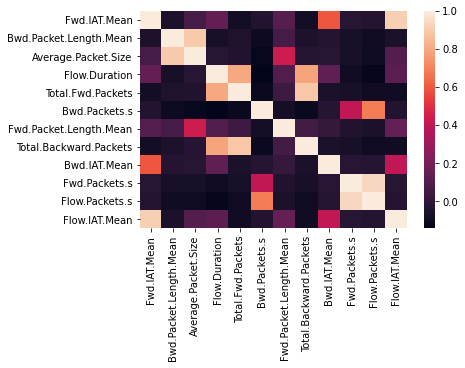

In [148]:
corr_matrix = data[list(set(['Flow.Duration','Total.Fwd.Packets','Total.Backward.Packets','Fwd.Packet.Length.Mean','Bwd.Packet.Length.Mean','Flow.Packets.s','Flow.IAT.Mean','Fwd.IAT.Mean','Bwd.IAT.Mean',
                             'Fwd.Packets.s','Bwd.Packets.s','Average.Packet.Size']))].corr()
sns.heatmap(corr_matrix)

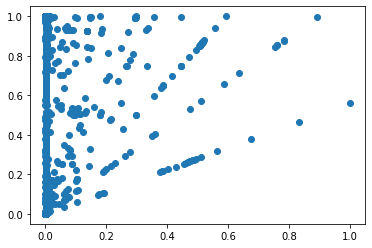

In [150]:
plt.scatter(df['Fwd.IAT.Mean'], df['Fwd.IAT.Total'])

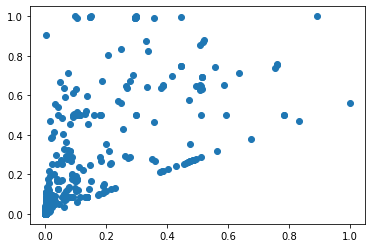

In [151]:
plt.scatter(df['Fwd.IAT.Mean'], df['Fwd.IAT.Max'])

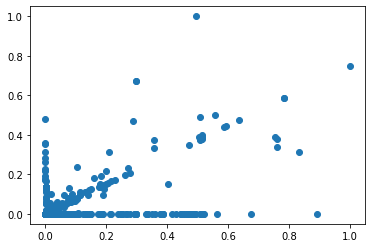

In [152]:
plt.scatter(df['Fwd.IAT.Mean'], df['Bwd.IAT.Mean'])

## normalization

In [320]:
from sklearn import preprocessing
def normalize_process(df):
    
    x = df.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    normalized_X =pd.DataFrame(x_scaled)
    normalized_X.columns = df.columns
    return normalized_X

In [321]:
df_numeric = df.drop(catergoical_features,axis=1)
df_numeric= normalize_process(df_numeric)


## onehot encoding

In [322]:
sf=one_hot_and_pca(df, ['Source.Port','Destination.Port'])
sf

,Source.Port_0,Source.Port_1,Destination.Port_0,Destination.Port_1
0,-0.340958,-0.019977,0.016794,0.964811
1,-0.340958,-0.019977,0.016794,0.964811
2,-0.340958,-0.019977,0.016794,0.964811
3,-0.340958,-0.019977,0.016794,0.964811
4,-0.340958,-0.019977,0.016794,0.964811
...,...,...,...,...
4312,-0.438553,-0.438283,0.710405,-0.266629
4313,-0.438553,-0.438283,0.710405,-0.266629
4314,-0.410660,-0.073430,0.710405,-0.266629
4315,-0.410660,-0.073430,0.710405,-0.266629


In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
def one_hot_and_pca(data, features):
    labelencoder = LabelEncoder()
    pca = PCA(n_components=2)
    onehot_encoding={}
    new_onehot={}
    for symbol in features:
        onehot_encoding[symbol]=pd.get_dummies(data[symbol], prefix=symbol)
      
        new_onehot[symbol] = pd.DataFrame(data=pca.fit_transform(onehot_encoding[symbol]),
                                          columns=[symbol+'_0',symbol+'_1'])
    new_onehot = pd.concat([new_onehot[symbol] for symbol in features], axis=1)
    return new_onehot

In [323]:
new_onehot={}
onehot_encoding={}
for symbol in ['Label', 'Protocol', 'time']:
        onehot_encoding[symbol]=pd.get_dummies(df[symbol], prefix=symbol)
new_onehot = pd.concat([onehot_encoding[symbol] for symbol in ['Label', 'Protocol', 'time']], axis=1)


In [324]:
df = pd.concat([df_numeric, sf, new_onehot],axis=1)

## 先把沒有變異數的features drop掉
varianceThreshold

In [325]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(df)
variances = selector.variances_
dropped_features = df.columns.values[variances < 0.000000001]
df = df.drop(dropped_features,axis=1)
df

,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Source.Port_0,Source.Port_1,Destination.Port_0,Destination.Port_1,Protocol_0,Protocol_17,Protocol_6,time_10,time_11,time_3,time_4,time_5,time_6,time_7,time_8,time_9
0,0.016844,0.001668,0.001715,0.002376,0.000131,0.035581,0.00000,0.047784,0.048204,0.023777,0.000000,0.050746,0.060225,7.805615e-06,3.446364e-06,0.003427,0.002895,0.005238,3.966739e-07,0.016844,0.003759,0.002561,0.005238,2.469690e-06,0.011836,0.003966,0.005819,0.006619,0.00003,0.0,0.002366,0.002146,2.213731e-06,0.000002,0.00000,0.024023,0.061412,0.073369,0.005383,0.0,0.0,1.0,0.0,0.0,0.0,0.065777,0.047784,0.050746,0.002366,0.001668,0.002376,0.001715,0.000131,0.222794,0.009948,0.000834,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
1,0.000546,0.002711,0.002744,0.001115,0.001100,0.016293,0.00000,0.014413,0.020049,0.070837,0.000000,0.266518,0.181457,9.534415e-04,1.677890e-04,0.000069,0.000074,0.000135,0.000000e+00,0.000546,0.000075,0.000104,0.000234,0.000000e+00,0.000339,0.000065,0.000138,0.000180,0.00000,0.0,0.003742,0.003373,1.067729e-04,0.000098,0.00000,0.070837,0.158653,0.202689,0.041083,0.0,0.0,1.0,0.0,0.0,0.0,0.165811,0.014413,0.266518,0.003742,0.002711,0.001115,0.002744,0.001100,0.222794,0.006935,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
2,0.000892,0.002711,0.004117,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.070837,0.000000,0.364830,0.177910,1.158221e-03,1.214423e-04,0.000094,0.000136,0.000329,0.000000e+00,0.000892,0.000122,0.000161,0.000329,1.487765e-08,0.000620,0.000076,0.000249,0.000404,0.00000,0.0,0.003742,0.005008,6.538848e-05,0.000090,0.00000,0.070837,0.268063,0.256974,0.066036,0.0,0.0,1.0,0.0,0.0,0.0,0.278283,0.014413,0.364830,0.003742,0.002711,0.001115,0.004117,0.002258,0.222794,0.006935,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
3,0.000628,0.002711,0.003774,0.001115,0.002258,0.016293,0.00000,0.014413,0.020049,0.131215,0.000000,0.397996,0.235479,1.645189e-03,1.658736e-04,0.000069,0.000077,0.000149,0.000000e+00,0.000628,0.000086,0.000107,0.000246,0.000000e+00,0.000420,0.000056,0.000151,0.000217,0.00000,0.0,0.004285,0.004599,9.288605e-05,0.000117,0.00000,0.131215,0.278373,0.303486,0.092104,0.0,0.0,1.0,0.0,0.0,0.0,0.289414,0.014413,0.397996,0.004285,0.002711,0.001115,0.003774,0.002258,0.222794,0.006935,0.000417,0.673469,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
4,0.000549,0.002920,0.004460,0.001115,0.002386,0.016293,0.00000,0.013452,0.019422,0.070837,0.000000,0.355878,0.168812,1.985465e-03,2.125490e-04,0.000054,0.000078,0.000161,0.000000e+00,0.000549,0.000070,0.000121,0.00031

## 把處理好的feature 先存檔

In [326]:
csv_pandas = df.to_csv('data.csv')

## feature selection

In [628]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'],axis=1)
df.shape
df
ans = pd.read_csv('cluster.csv')

In [629]:
selector.fit(df)
variances = selector.variances_
dropped_features = df.columns.values[variances < 0.05]
df_selected = df.drop(dropped_features,axis=1)
df_selected


,Flow.Duration,Fwd.IAT.Total,Bwd.IAT.Total,PSH.Flag.Count,ACK.Flag.Count,min_seg_size_forward,Source.Port_0,Source.Port_1,Destination.Port_0,Destination.Port_1,Protocol_0,Protocol_17,Protocol_6,time_10,time_11,time_3,time_4,time_5,time_9
0,0.016844,0.016844,0.011836,1.0,0.0,0.673469,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0
1,0.000546,0.000546,0.000339,1.0,0.0,0.673469,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0
2,0.000892,0.000892,0.000620,1.0,0.0,0.673469,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0
3,0.000628,0.000628,0.000420,1.0,0.0,0.673469,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0
4,0.000549,0.000549,0.000331,1.0,0.0,0.673469,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.991962,0.991512,0.0,0.0,0.428571,-0.438553,-0.438283,0.710405,-0.266629,0,1,0,0,0,0,0,1,0
4313,0.261736,0.261733,0.261658,0.0,0.0,0.428571,-0.438553,-0.438283,0.710405,-0.266629,0,1,0,0,0,0,0,1,0
4314,0.636258,0.636258,0.000000,0.0,0.0,0.428571,-0.410660,-0.073430,0.710405,-0.266629,0,1,0,0,0,0,0,1,0
4315,0.113510,0.113510,0.000000,0.0,0.0,0.428571,-0.410660,-0.073430,0.710405,-0.266629,0,1,0,0,0,0,0,1,0


In [131]:
from sklearn.preprocessing import StandardScaler
def PCA_process(df):
    
    X = StandardScaler().fit_transform(df)
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(X)
    return data_pca

###  variance <0.05, refrernce

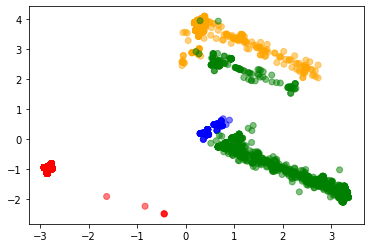

In [548]:
data_pca = PCA_process(df_selected)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}),alpha=.5)

###  variance <0.01, refrernce

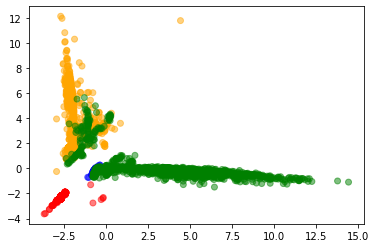

In [556]:
data_pca = PCA_process(df_selected)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}),alpha=.5)

In [190]:
df_ans['Cluster'].value_counts()

3    1695
2    1631
0     856
1     135
Name: Cluster, dtype: int64

In [192]:
df_selected['PSH.Flag.Count'].value_counts()

0.0    3594
1.0     723
Name: PSH.Flag.Count, dtype: int64

## no time and variance < 0.05, reference

In [655]:
df_selected.shape

(4317, 44)

In [654]:
df_no_time=df_selected.drop(['time_10','time_11','time_3','time_4','time_5','time_9'],axis=1)

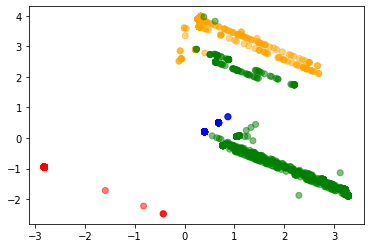

In [632]:
data_pca = PCA_process(df_no_time)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}),alpha=.5)

### k-means

0.798141392649464

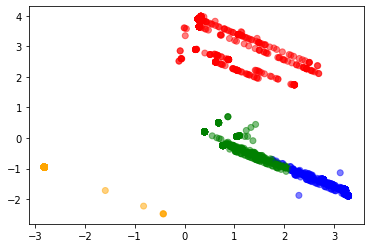

In [633]:
from sklearn.cluster import KMeans
df = df_no_time
X= df.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

### agglomerativeClustering

0.8498698090530064

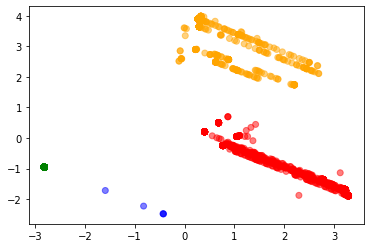

In [637]:
df = df_no_time
X= df.values

clustering = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='single').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

### DBSCAN

use e=0.1 and s=5, the best score is 0.6412994332958418
use e=0.1 and s=20, the best score is 0.6471516473399538
use e=0.1 and s=50, the best score is 0.6560170586809567
use e=0.1 and s=100, the best score is 0.6584476958174492
use e=0.1 and s=200, the best score is 0.728760117998809
use e=0.3 and s=5, the best score is 0.7778403018289504
use e=0.4 and s=5, the best score is 0.7833220465192059
use e=0.4 and s=100, the best score is 0.78804534954612
use e=0.5 and s=20, the best score is 0.7924609385649194
use e=0.5 and s=100, the best score is 0.7950134035378472
use e=0.7 and s=100, the best score is 0.7973990814733262
use e=0.8 and s=100, the best score is 0.8004453278383241
use e=1.1 and s=5, the best score is 0.85290271332598


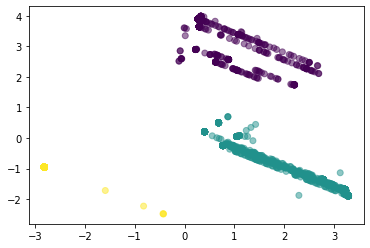

In [640]:
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")
# labels = pd.Series(dbscan.labels_)
# plt.scatter(data_pca[:, 0], data_pca[:, 1],
#             c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)

## no time and variance<0.01, reference

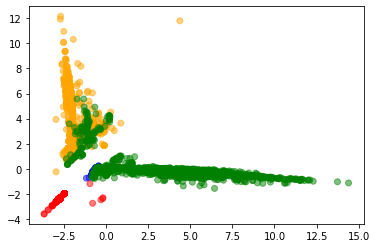

In [551]:
data_pca = PCA_process(df_no_time)
plt.scatter(data_pca[:, 0], data_pca[:, 1],c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}),alpha=.5)

### k-means
### AgglomerativeClustering
### DBSCAN

0.7971209441947383

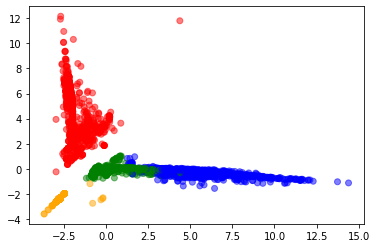

In [657]:
df = df_no_time
X= df.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

0.8498698090530062

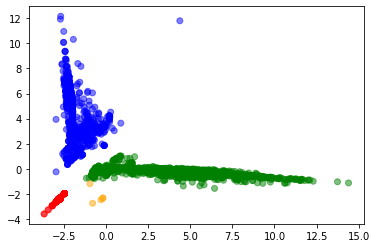

In [658]:
df = df_no_time
X= df.values

clustering = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='single').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

use e=0.1 and s=5, the best score is 0.5320699394188005
use e=0.1 and s=20, the best score is 0.5931539185529623
use e=0.1 and s=50, the best score is 0.6138629028630562
use e=0.3 and s=5, the best score is 0.6536812372767958
use e=0.4 and s=5, the best score is 0.6621013312718865
use e=0.4 and s=50, the best score is 0.6863258953147606
use e=0.5 and s=50, the best score is 0.6938851127191764
use e=0.7 and s=50, the best score is 0.6962907656732256
use e=0.9 and s=50, the best score is 0.7074826523064073
use e=1.1 and s=5, the best score is 0.826709295013593
use e=1.3 and s=5, the best score is 0.8271277607458024
use e=1.3 and s=100, the best score is 0.8272148247206468
use e=1.4 and s=5, the best score is 0.8276406444303006
use e=1.4 and s=100, the best score is 0.828267019960343
use e=1.5 and s=5, the best score is 0.8494295276199343
use e=1.6 and s=5, the best score is 0.8522030136492982


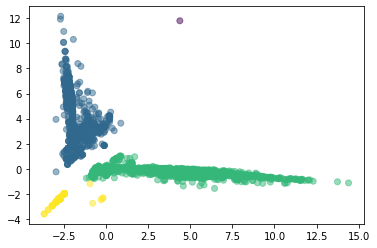

In [659]:
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")
# labels = pd.Series(dbscan.labels_)
# plt.scatter(data_pca[:, 0], data_pca[:, 1],
#             c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)

## Destination Port without PCA

In [599]:
df_try = pd.concat([df_numeric, sf, new_onehot],axis=1).drop(['Destination.Port_0','Destination.Port_1'],axis=1)
# df_try = pd.concat([df_try,pd.get_dummies(data['Destination.Port'], prefix='Destination.Port')],axis=1)

In [600]:
selector.fit(df_try)
variances = selector.variances_
dropped_features = df_try.columns.values[variances < 0.05]
df_try_selected = df_try.drop(dropped_features,axis=1)

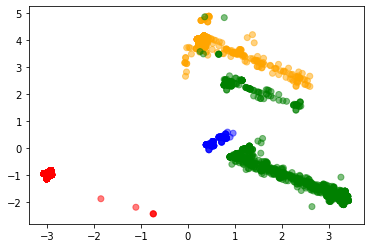

In [601]:
df_try = pd.concat([df_try_selected,pd.get_dummies(data['Destination.Port'], prefix='Destination.Port')],axis=1)
data_pca = PCA_process(df_try)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)

0.7985585128637656

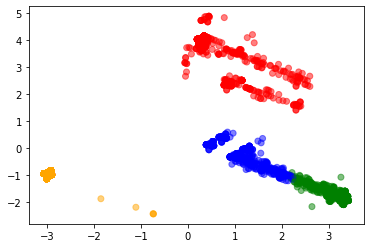

In [660]:
df = df_try
X= df.values

kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

0.8503872508456108

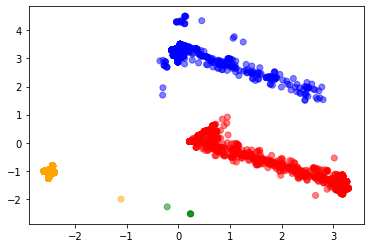

In [617]:
from sklearn.cluster import AgglomerativeClustering
df = df_try_selected
X= df.values
clustering = AgglomerativeClustering(n_clusters=4, affinity='manhattan',linkage='single').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

use e=0.1 and s=5, the best score is 0.4012334204483131
use e=0.1 and s=20, the best score is 0.4216574407240277
use e=0.1 and s=50, the best score is 0.4841780249436943
use e=0.1 and s=100, the best score is 0.5053799984988983
use e=1.1 and s=5, the best score is 0.850387250845611
use e=1.4 and s=5, the best score is 0.85290271332598


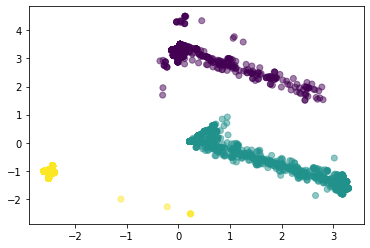

In [603]:
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")
# labels = pd.Series(dbscan.labels_)
# plt.scatter(data_pca[:, 0], data_pca[:, 1],
#             c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)

## 只用port 跟protocol去做分類

In [607]:
new_onehot={}
onehot_encoding={}
for symbol in ['Source.Port','Destination.Port', 'Protocol']:
        onehot_encoding[symbol]=pd.get_dummies(data[symbol], prefix=symbol)
few_features = pd.concat([onehot_encoding[symbol] for symbol in ['Source.Port','Destination.Port', 'Protocol']], axis=1)


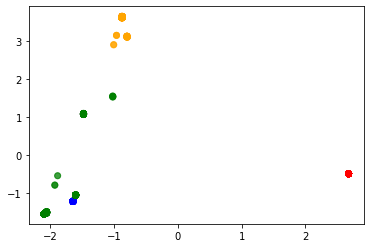

In [608]:
data_pca = PCA_process(few_features)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)

0.6896304483161192

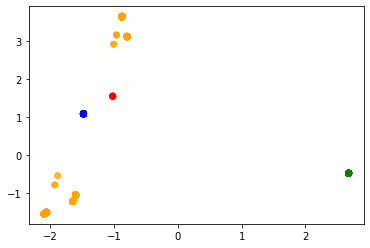

In [619]:
df = few_features
X= df.values
clustering = AgglomerativeClustering(n_clusters=4, affinity='l2',linkage='single').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

0.9904195002627223

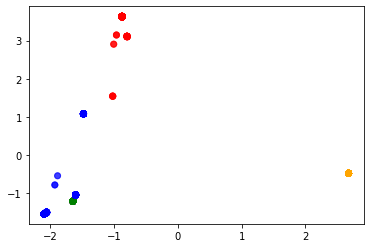

In [611]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

In [614]:
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")
# labels = pd.Series(dbscan.labels_)
# plt.scatter(data_pca[:, 0], data_pca[:, 1],
#             c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)

use e=0.1 and s=5, the best score is 0.6573719144206681
use e=0.1 and s=20, the best score is 0.6704271787484339
use e=0.1 and s=50, the best score is 0.6748008358567196
use e=1.5 and s=5, the best score is 0.9014028342182842


KeyboardInterrupt: 

0.9014028342182842


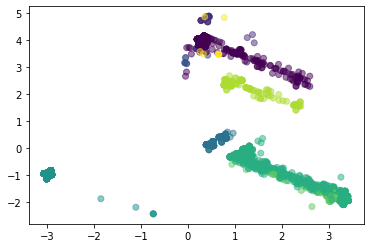

In [662]:
df = few_features
X= df.values
dbscan = DBSCAN(eps=1.5, min_samples=5).fit(X)
print(adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_))
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)

## variace<0.05

In [559]:
df = df_selected
X= df.values
from sklearn.metrics.cluster import adjusted_mutual_info_score
# df = pd.read_csv('data.csv')
# df = df.drop(['Unnamed: 0'],axis=1)

0.7983493080243805

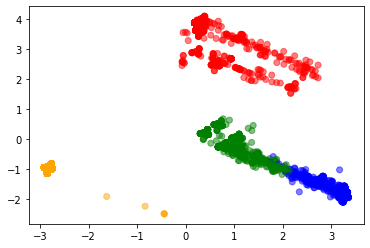

In [560]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

0.798245189541427

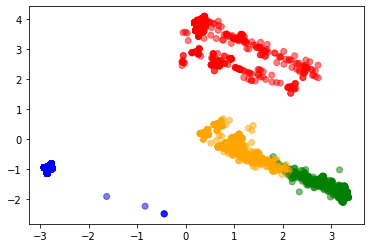

In [561]:
X= df.values
kmeans = KMeans(init='random', n_clusters=4, random_state=0, n_init=100, max_iter=500, tol=1e-2).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

0.7951733668315384

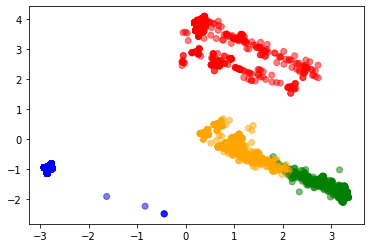

In [562]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4).fit(X)
labels = pd.Series(kmeans.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

0.8032534017441852

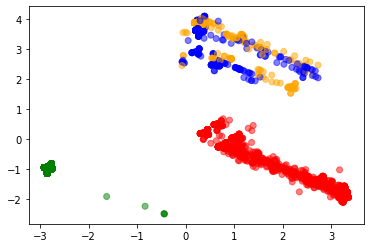

In [568]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='l2',linkage='complete').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

0.8068330337998596

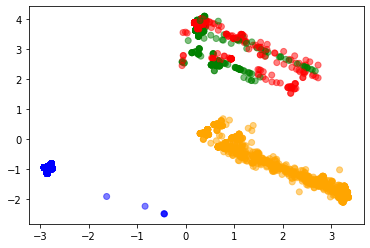

In [567]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='cosine',linkage='average').fit(X)
labels = pd.Series(clustering.labels_)
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels.map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

In [577]:
from sklearn.cluster import DBSCAN
X= df.values
data_pca = PCA_process(df)
# X = data_pca.values
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")
# labels = pd.Series(dbscan.labels_)
# plt.scatter(data_pca[:, 0], data_pca[:, 1],
#             c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)




use e=0.1 and s=5, the best score is 0.42916965932722695
use e=0.1 and s=20, the best score is 0.4564665943144225
use e=0.1 and s=50, the best score is 0.4991632924703042
use e=0.1 and s=100, the best score is 0.5245849194113803
use e=1.1 and s=5, the best score is 0.8488020955411867
use e=1.1 and s=20, the best score is 0.8516498688007204
use e=1.2 and s=20, the best score is 0.8519035003115256
use e=1.4 and s=5, the best score is 0.85290271332598


0.85290271332598

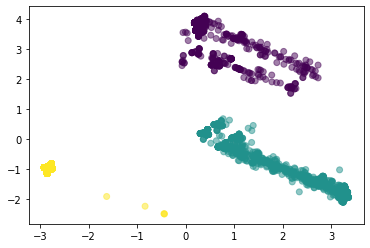

In [579]:
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)
# sns.scatterplot(X[:,0], X[:,1], hue=["cluster-{}".format(x) for x in dbscan.labels_])

## Variance< 0.01

In [651]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'],axis=1)
selector.fit(df)
variances = selector.variances_
dropped_features = df.columns.values[variances < 0.01]
df_selected = df.drop(dropped_features,axis=1)
df_selected


,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.IAT.Max,Fwd.IAT.Total,Fwd.IAT.Max,Bwd.IAT.Total,Fwd.PSH.Flags,Fwd.Header.Length,Bwd.Header.Length,Packet.Length.Std,SYN.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,Down.Up.Ratio,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Bwd.Packets,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Max,Active.Min,Source.Port_0,Source.Port_1,Destination.Port_0,Destination.Port_1,Protocol_0,Protocol_17,Protocol_6,time_10,time_11,time_3,time_4,time_5,time_6,time_7,time_8,time_9
0,0.016844,0.001668,0.001715,0.000000,0.050746,0.060225,0.005238,0.016844,0.005238,0.011836,0.0,0.002366,0.002146,0.073369,0.0,1.0,0.0,0.0,0.0,0.050746,0.002366,0.001668,0.001715,0.000834,0.673469,0.000000e+00,0.000000e+00,0.000000e+00,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
1,0.000546,0.002711,0.002744,0.000000,0.266518,0.181457,0.000135,0.000546,0.000234,0.000339,0.0,0.003742,0.003373,0.202689,0.0,1.0,0.0,0.0,0.0,0.266518,0.003742,0.002711,0.002744,0.000417,0.673469,0.000000e+00,0.000000e+00,0.000000e+00,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
2,0.000892,0.002711,0.004117,0.000000,0.364830,0.177910,0.000329,0.000892,0.000329,0.000620,0.0,0.003742,0.005008,0.256974,0.0,1.0,0.0,0.0,0.0,0.364830,0.003742,0.002711,0.004117,0.000417,0.673469,0.000000e+00,0.000000e+00,0.000000e+00,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
3,0.000628,0.002711,0.003774,0.000000,0.397996,0.235479,0.000149,0.000628,0.000246,0.000420,0.0,0.004285,0.004599,0.303486,0.0,1.0,0.0,0.0,0.0,0.397996,0.004285,0.002711,0.003774,0.000417,0.673469,0.000000e+00,0.000000e+00,0.000000e+00,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
4,0.000549,0.002920,0.004460,0.000000,0.355878,0.168812,0.000161,0.000549,0.000319,0.000331,0.0,0.004765,0.005417,0.248396,0.0,1.0,0.0,0.0,0.0,0.355878,0.004765,0.002920,0.004460,0.000417,0.673469,0.000000e+00,0.000000e+00,0.000000e+00,-0.340958,-0.019977,0.016794,0.964811,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,0.992006,0.447341,0.733448,0.403670,0.044598,0.016147,0.017263,0.991962,0.017266,0.991512,0.0,0.447234,0.719863,0.023059,0.0,0.0,0.0,0.0,0.0,0.044598,0.447234,0.447341,0.733448,0.447341,0.428571,0.000000e+00,0.000000e+00,0.000000e+00,-0.438553,-0.438283,0.710405,-0.266629,0,1,0,0,0,0,0,1,0,0,0,0
4313,0.261736,0.134724,0.220240,0.394495,0.041528,0.014514,0.012229,0.261733,0.012231,0.261658,0.0,0.131276,0.217640,0.020656,0.0,0.0,0.0,0.0,0.0,0.041528,0.131276,0.134724,0.220240,0.134724,0.428571,0.000000e+00,0.000000e+00,0.000000e+00,-0.438553,-0.438283,0.710405,-0.266629,0,1,0,0,0,0,0,1,0,0,0,0
4314,0.636258,0.000626,0.000000,0.000000,0.000000,0.000000,0.636751,0.636258,0.636751,0.000000,0.0,0.000831,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000831,0.000626,0.000000,0.000626,0.428571,9.008458e-09,9.008458e-09,9.008458e-09,-0.410660,-0.073430,0.710405,-0.266629,0,1,0,0,0,0,0,1,0,0,0,0
4315,0.113510,0.000626,0.000000,0.000000,0.000000,0.000000,0.113597,0.113510,0.113597,0.000000,0.0,0.000736,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000736,0.000626,0.000000,0.000626,0.428571,9.008458e-09,9.008458e-09,9.008458e-09,-0.410660,-0.073430,0.710405,-0.266629,0,1,0,0,0,0,0,1,0,0,0,0


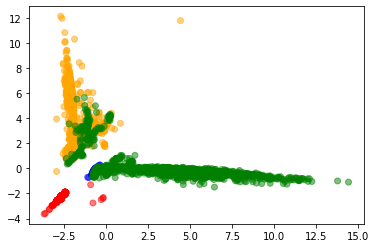

In [652]:
df = df_selected
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=ans['Cluster'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)

0.7973225034097374

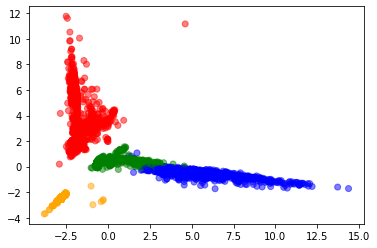

In [482]:
df = df_selected
X= df.values
kmeans = KMeans(init='k-means++', n_clusters=4, random_state=0, n_init=100, max_iter=500, tol=1e-2).fit(X)
df['c'] = kmeans.labels_
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=df['c'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], kmeans.labels_)

0.8522030136492982

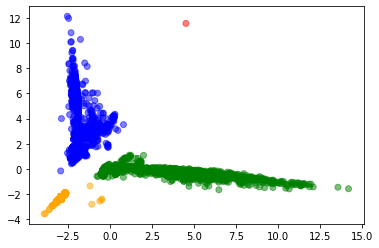

In [481]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=4, affinity='l2',linkage='single').fit(X)
df['c'] = clustering.labels_
data_pca = PCA_process(df)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=df['c'].map({0:'orange',1:'blue'
                               ,2:'red',3:'green'}), alpha=.5)
adjusted_mutual_info_score(ans['Cluster'], clustering.labels_)

use e=0.1 and s=5, the best score is 0.4280021505771536
use e=0.1 and s=20, the best score is 0.451389411485034
use e=0.3 and s=20, the best score is 0.4718703671362454
use e=0.3 and s=50, the best score is 0.5032103044413783
use e=1.5 and s=5, the best score is 0.8487352544685762
use e=1.6 and s=5, the best score is 0.8494295276199343


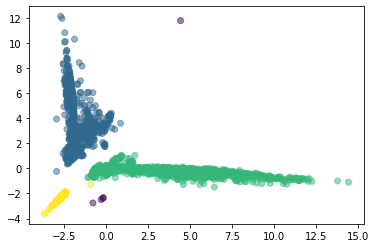

In [581]:
from sklearn.cluster import DBSCAN
df = df_selected
X= df.values
data_pca = PCA_process(df)
# X = data_pca.values
score = 0
e = 0
s = 0
for eps in range(1,30,1):
    for min_samples in [5,20,50,100,200]:
        dbscan = DBSCAN(eps=eps/10, min_samples=min_samples).fit(X)
        if adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)>score:
            score = adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
            e = eps
            s = min_samples
            print(f"use e={e/10} and s={s}, the best score is {score}")

dbscan = DBSCAN(eps=e/10, min_samples=s).fit(X)
adjusted_mutual_info_score(ans['Cluster'], dbscan.labels_)
labels = pd.Series(dbscan.labels_)
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=labels, alpha=.5)